In [ ]:
#imports
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from stopwordRemoval import StopwordRemoval
from sentenceSegmentation import SentenceSegmentation
from tokenization import Tokenization
from nltk.corpus import stopwords
from util import *
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
tokenizer = Tokenization()
sentenceSegmenter = SentenceSegmentation()
stopwordRemover = StopwordRemoval()

In [ ]:
# Loading all the documents in the cranfield dataset in the list
with open(r"..\cranfield\cran_docs.json", "r", encoding="utf-8") as file:
    data = json.load(file)
# documents is the list of all the documents in the cranfield dataset
documents = [item["body"] for item in data]
print("Total No. of documents in this list are",len(documents))

Total No. of documents in this list are 1400


In [ ]:
def idf_stopwords(documents, percentile=5):
   """
   Creating the list of stopwords from cranfield corpus of documents
   using the percentile method.
   Observed that most words have the idf_score of 7
   Making them rarer words and having too low threshold for percentile
   ----------
   Arg1: Documents List
   Arg2: Threshold percentile
   Returns: Stopwords list
    """
   vectorizer = TfidfVectorizer(smooth_idf=True)
   matrix = vectorizer.fit_transform(documents)
   features = vectorizer.get_feature_names_out() # Vocabulary words
   idf_scores = vectorizer.idf_                  # IDF scores

  # Computing the 5th percentile threshold
   threshold = np.percentile(idf_scores, percentile)

  # Selecting stopwords with IDF in the 0 to 5 percentile range
   stopwords = [word for word, idf in zip(features, idf_scores) if idf < threshold]

   return stopwords , idf_scores

In [ ]:
# Getting the stopwords list and idf scores from the documents list
corpus_based_stopwords , idf_scores = idf_stopwords(documents)

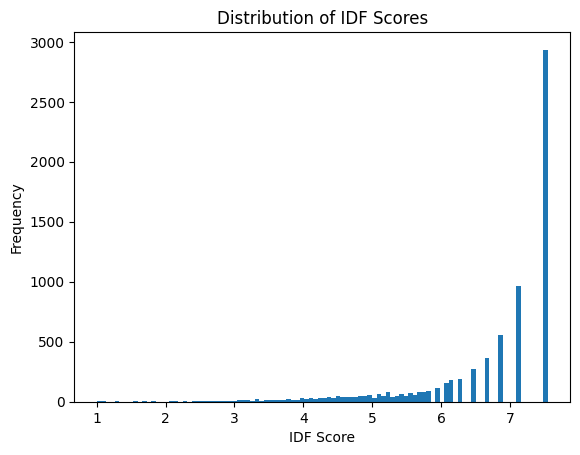

In [ ]:
# Plotting the distribution of IDF scores
plt.hist(idf_scores, bins=100)
plt.xlabel("IDF Score")
plt.ylabel("Frequency")
plt.title("Distribution of IDF Scores")
plt.show()


In [7]:
print("Total No. of stopwords created are",len(corpus_based_stopwords))

Total No. of stopwords created are 364


In [8]:
# Stopwords from corpus
print(corpus_based_stopwords)

['10', 'about', 'above', 'account', 'accuracy', 'aerodynamic', 'agreement', 'air', 'aircraft', 'all', 'along', 'also', 'an', 'analysis', 'analytical', 'and', 'angle', 'angles', 'any', 'applicable', 'application', 'applied', 'approximate', 'approximately', 'approximation', 'arbitrary', 'are', 'as', 'associated', 'assumed', 'at', 'attack', 'available', 'axial', 'based', 'basis', 'be', 'been', 'behind', 'being', 'bending', 'between', 'blunt', 'bodies', 'body', 'both', 'boundary', 'buckling', 'but', 'by', 'calculated', 'calculation', 'calculations', 'can', 'case', 'cases', 'certain', 'characteristics', 'circular', 'coefficient', 'coefficients', 'compared', 'comparison', 'compressible', 'condition', 'conditions', 'cone', 'considered', 'constant', 'corresponding', 'critical', 'cross', 'cylinder', 'cylinders', 'cylindrical', 'data', 'density', 'derived', 'described', 'design', 'determine', 'determined', 'developed', 'development', 'different', 'differential', 'dimensional', 'direction', 'disc

In [9]:
# Stopwords from NLTK
print(set(stopwords.words("english")))

{"haven't", 'during', 'is', 'him', "i'm", 'their', 'didn', 'himself', 'myself', 'them', "shouldn't", 'up', "wasn't", 'my', 'i', 'mustn', 'between', "aren't", 'just', 'each', 've', 'or', 'there', 'nor', 'yourself', 'few', 'than', "doesn't", 'o', 'over', 'an', 'ours', 'doing', 'can', 'where', 'a', 'above', 'some', "mustn't", "won't", "we'd", "that'll", 'does', 'your', 're', 'these', 'again', 'more', 'be', 'am', 'd', 'mightn', 'herself', 'how', 'has', 'out', 'while', 'this', 'y', 'so', 't', "she'd", 'its', 'once', 'needn', 'on', 'shouldn', 'who', 'until', 'hadn', "it'd", 'are', 'against', 'to', 'here', "she'll", 'wouldn', 'about', 'we', 'own', 'you', "hasn't", 'for', 'was', 'below', "couldn't", 'any', 'at', 'she', 'then', "shan't", "he'd", "he's", 'themselves', 'if', 'his', "didn't", 'such', 'yours', "needn't", 'did', 'because', "they're", 'me', 'into', 'have', 'when', 'ourselves', 'with', 'weren', 'further', "isn't", 'isn', 'will', 'aren', 'm', 'too', "you've", 'through', 'other', "she's

In [10]:
# Comparing on document No. 100
doc = documents[99]
print("Original Document:", doc)
# Sentence Segmentation
sentences = sentenceSegmenter.punkt(doc)
# Tokenization
tokens = tokenizer.pennTreeBank(sentences)
# Stopword Removal using standard list
Standard_cleaning = stopwordRemover.fromList(tokens)

Original Document: vibration isolation of aircraft power plants . vibration in aircraft structure can almost always be traced to vibratory forces originating from the power plant .  these forces are transmitted to the aircraft in two ways ..  (1) by the action of air forces upon the surfaces of the aircraft in, or adjacent to, the slip stream of the propeller, and (2) by direct transmission of unbalanced forces from the power plant through the engine mounting .  the latter has always caused the preponderance of disturbance . vibratory stresses induced in the engine mounting structure occasionally produce fatigue failures in the associated parts, and always shorten the useful life of the entire aircraft structure .  more important, however, are the psychological and physiological effects of continuous vibration and its attendant noise on the passengers and crew .  this may very likely be the major source of the rapid fatigue which is so intimately associated with flying .  the importanc

In [11]:
# Stopword Removal using custom stopwords list
def stopwords_sieve(tokens , stopwords_list):
			return [token for token in tokens if token.lower() not in stopwords_list]
		
Custom_cleaning = [stopwords_sieve(token , corpus_based_stopwords) for token in tokens]

In [ ]:
# We can see words like aircraft, structures , power are not present after using custom stopwords list.
print("Using Standard Stopwords:", (Standard_cleaning))
print("Using corpus based Stopwords:", (Custom_cleaning))

Using Standard Stopwords: [['vibration', 'isolation', 'aircraft', 'power', 'plants', '.'], ['vibration', 'aircraft', 'structure', 'almost', 'always', 'traced', 'vibratory', 'forces', 'originating', 'power', 'plant', '.'], ['forces', 'transmitted', 'aircraft', 'two', 'ways', '..', '(', '1', ')', 'action', 'air', 'forces', 'upon', 'surfaces', 'aircraft', ',', 'adjacent', ',', 'slip', 'stream', 'propeller', ',', '(', '2', ')', 'direct', 'transmission', 'unbalanced', 'forces', 'power', 'plant', 'engine', 'mounting', '.'], ['latter', 'always', 'caused', 'preponderance', 'disturbance', '.'], ['vibratory', 'stresses', 'induced', 'engine', 'mounting', 'structure', 'occasionally', 'produce', 'fatigue', 'failures', 'associated', 'parts', ',', 'always', 'shorten', 'useful', 'life', 'entire', 'aircraft', 'structure', '.'], ['important', ',', 'however', ',', 'psychological', 'physiological', 'effects', 'continuous', 'vibration', 'attendant', 'noise', 'passengers', 'crew', '.'], ['may', 'likely', 'm